<a href="https://colab.research.google.com/github/ArunamAlok/DSSI/blob/main/Alok_Arunam_Ashoka_IDCA_R3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 72.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#import basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#import spatial analysis libraries
import pysal as ps
import geopandas as gpd

#import machine learning library
from sklearn import cluster

In [ ]:
#reading geojson file using geopandas

ds2 = gpd.read_file('/content/drive/My Drive/Colab Notebooks/climate_health_anonymized_dataset.geojson')
ds2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 45040 entries, 0 to 45039
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   rajas_id                               45040 non-null  float64 
 1   block_code_census                      45040 non-null  object  
 2   rain                                   45040 non-null  float64 
 3   population_density                     45040 non-null  float64 
 4   rural_facilities                       45040 non-null  float64 
 5   land_surface_temperature_during_day    45040 non-null  float64 
 6   land_surface_temperature_during_night  45040 non-null  float64 
 7   ultraviolet_index                      45040 non-null  float64 
 8   pm_2.5                                 45040 non-null  float64 
 9   number_of_tb_cases                     45040 non-null  int64   
 10  number_of_heart_disease_cases          45040 non-n

In [ ]:
#Checking for missing values
ds2.nunique()
ds2.isnull().sum()

# summary statistics

#health-related parameters
print(round(ds2.iloc[:,9:16].describe(),2).T)

#demographic and climatic parameters
round(ds2.iloc[:,2:9].describe(),2).T

                                      count   mean    std  min   25%   50%  \
number_of_tb_cases                  45040.0  28.94  17.08  0.0  14.0  29.0   
number_of_heart_disease_cases       45040.0   9.48   5.77  0.0   4.0  10.0   
number_of_cancer_cases              45040.0   6.99   4.32  0.0   3.0   7.0   
number_of_child_malnutrition_cases  45040.0   6.50   4.03  0.0   3.0   6.5   
number_of_maternal_anemia_cases     45040.0  10.54   6.35  0.0   5.0  11.0   
number_of_smoker_cases              45040.0  52.29  30.70  0.0  26.0  52.0   
number_of_lung_problem_cases        45040.0  22.00  13.03  0.0  11.0  22.0   

                                     75%    max  
number_of_tb_cases                  44.0   58.0  
number_of_heart_disease_cases       14.0   19.0  
number_of_cancer_cases              11.0   14.0  
number_of_child_malnutrition_cases  10.0   13.0  
number_of_maternal_anemia_cases     16.0   21.0  
number_of_smoker_cases              79.0  105.0  
number_of_lung_problem_ca

,count,mean,std,min,25%,50%,75%,max
rain,45040.0,1.72,0.64,0.56,1.22,1.72,2.16,3.06
population_density,45040.0,5.28,0.70,2.35,4.93,5.28,5.68,8.30
rural_facilities,45040.0,170.18,55.04,55.00,138.00,168.00,191.00,591.00
land_surface_temperature_during_day,45040.0,15194.43,123.46,14770.00,15128.00,15194.43,15277.00,15537.00
land_surface_temperature_during_night,45040.0,14488.07,103.71,14145.00,14438.00,14498.00,14555.00,14871.00
ultraviolet_index,45040.0,9.29,0.46,8.26,9.06,9.30,9.69,10.09
pm_2.5,45040.0,40.36,7.88,26.38,35.08,37.94,42.74,68.49


In [ ]:
#aggregating columns by block
ds2_d=ds2.dissolve(by='block_code_census',aggfunc='mean')

In [ ]:
#Alternate way of aggregating at the block level

ds2_block=ds2['block_code_census'].unique()

ds2_rain=[]
mean=[]
for i in range(len(ds2_block)):
  mean=ds2[ds2['block_code_census']==ds2_block[i]]['rain'].mean()
  ds2_rain.append(mean)

ds2_pm=[]
mean=[]
for i in range(len(ds2_block)):
  mean=ds2[ds2['block_code_census']==ds2_block[i]]['pm_2.5'].mean()
  ds2_pm.append(mean)


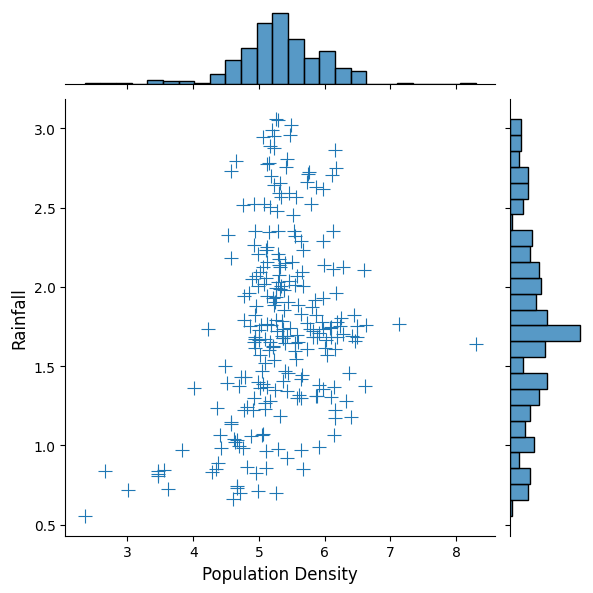

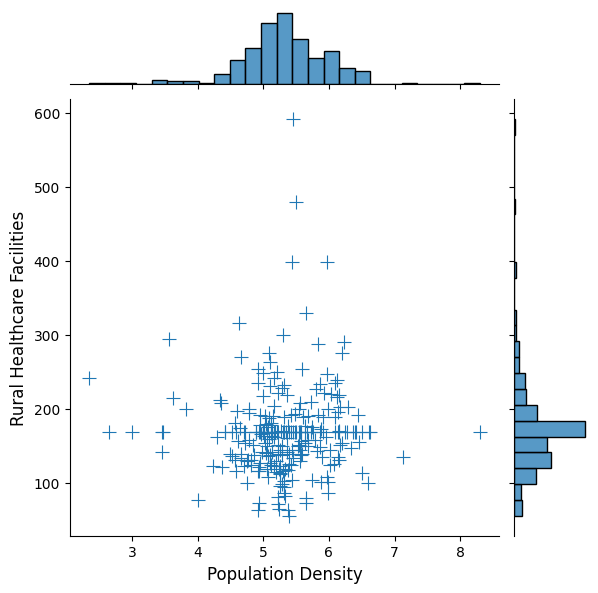

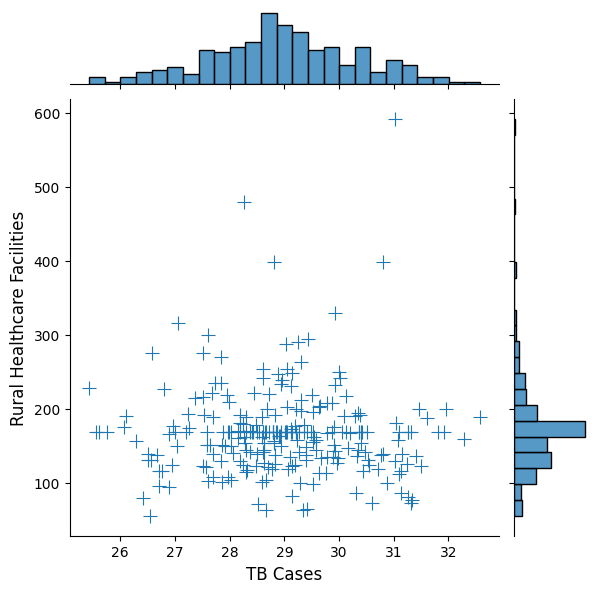

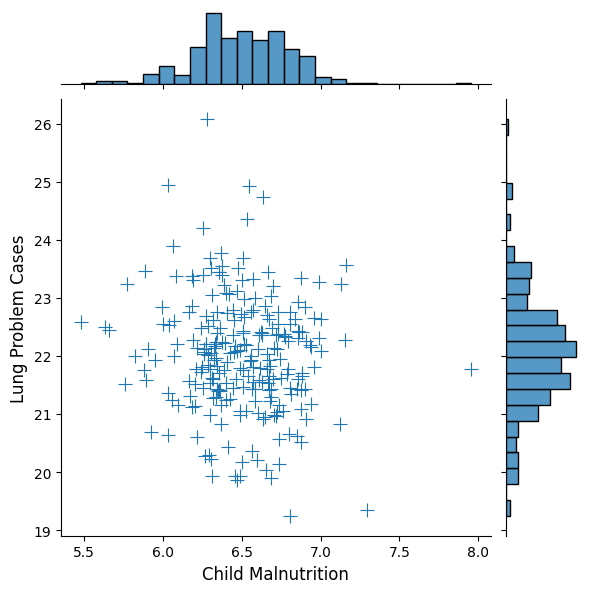

In [ ]:
#joint plot

plot= sns.jointplot( x=ds2_d['population_density'], y=ds2_d['rain'], marker="+", s=100, marginal_kws=dict(bins=25, fill=True))
plot.set_axis_labels('Population Density', 'Rainfall', fontsize=12)

plot= sns.jointplot( x=ds2_d['population_density'], y=ds2_d['rural_facilities'], marker="+", s=100, marginal_kws=dict(bins=25, fill=True))
plot.set_axis_labels('Population Density', 'Rural Healthcare Facilities', fontsize=12)

plot= sns.jointplot( x=ds2_d['number_of_tb_cases'], y=ds2_d['rural_facilities'], marker="+", s=100, marginal_kws=dict(bins=25, fill=True))
plot.set_axis_labels('TB Cases', 'Rural Healthcare Facilities', fontsize=12)

plot= sns.jointplot( x=ds2_d['number_of_child_malnutrition_cases'], y=ds2_d['number_of_lung_problem_cases'], marker="+", s=100, marginal_kws=dict(bins=25, fill=True))
plot.set_axis_labels('Child Malnutrition', 'Lung Problem Cases', fontsize=12)

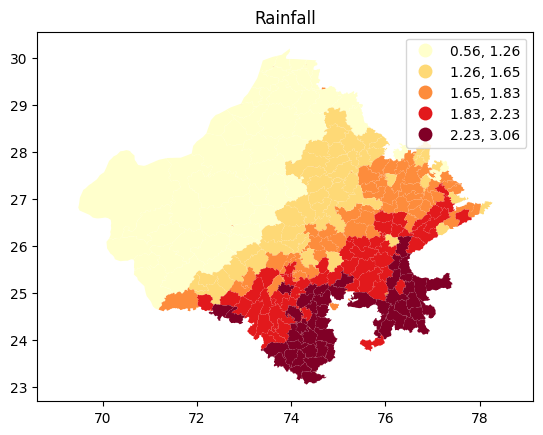

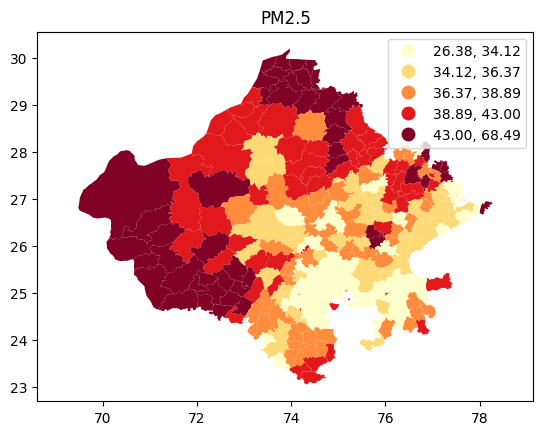

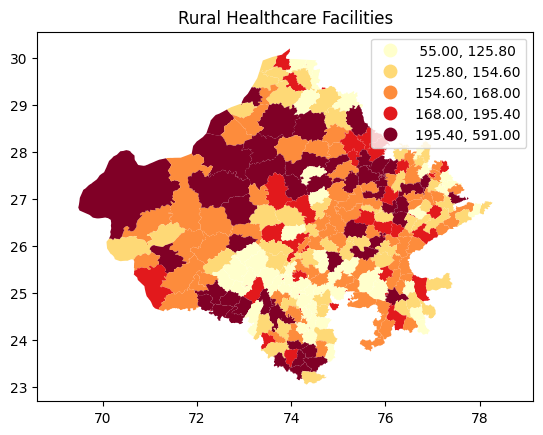

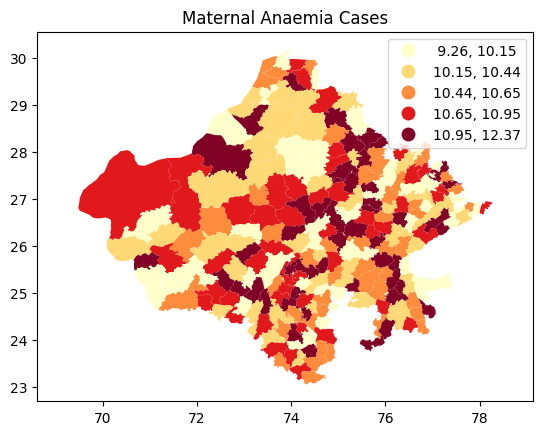

In [ ]:
#geospatial visualisation of climatic and health-related parameters

#rainfall distribution

ds2_d.plot(column = 'rain', scheme='quantiles', cmap='YlOrRd',legend=True)
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title('Rainfall')
# Display the map
plt.show()


#PM2.5 distribution

ds2_d.plot(column = 'pm_2.5', scheme='quantiles', cmap='YlOrRd',legend=True)
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title('PM2.5')
# Display the map
plt.show()

#rural healthcare facilities

ds2_d.plot(column = 'rural_facilities', scheme='quantiles', cmap='YlOrRd',legend=True)
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title('Rural Healthcare Facilities')
# Display the map
plt.show()

#Maternal Anaemia Cases
ds2_d.plot(column = 'number_of_maternal_anemia_cases', scheme='quantiles', cmap='YlOrRd',legend=True)
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title('Maternal Anaemia Cases')
# Display the map
plt.show()

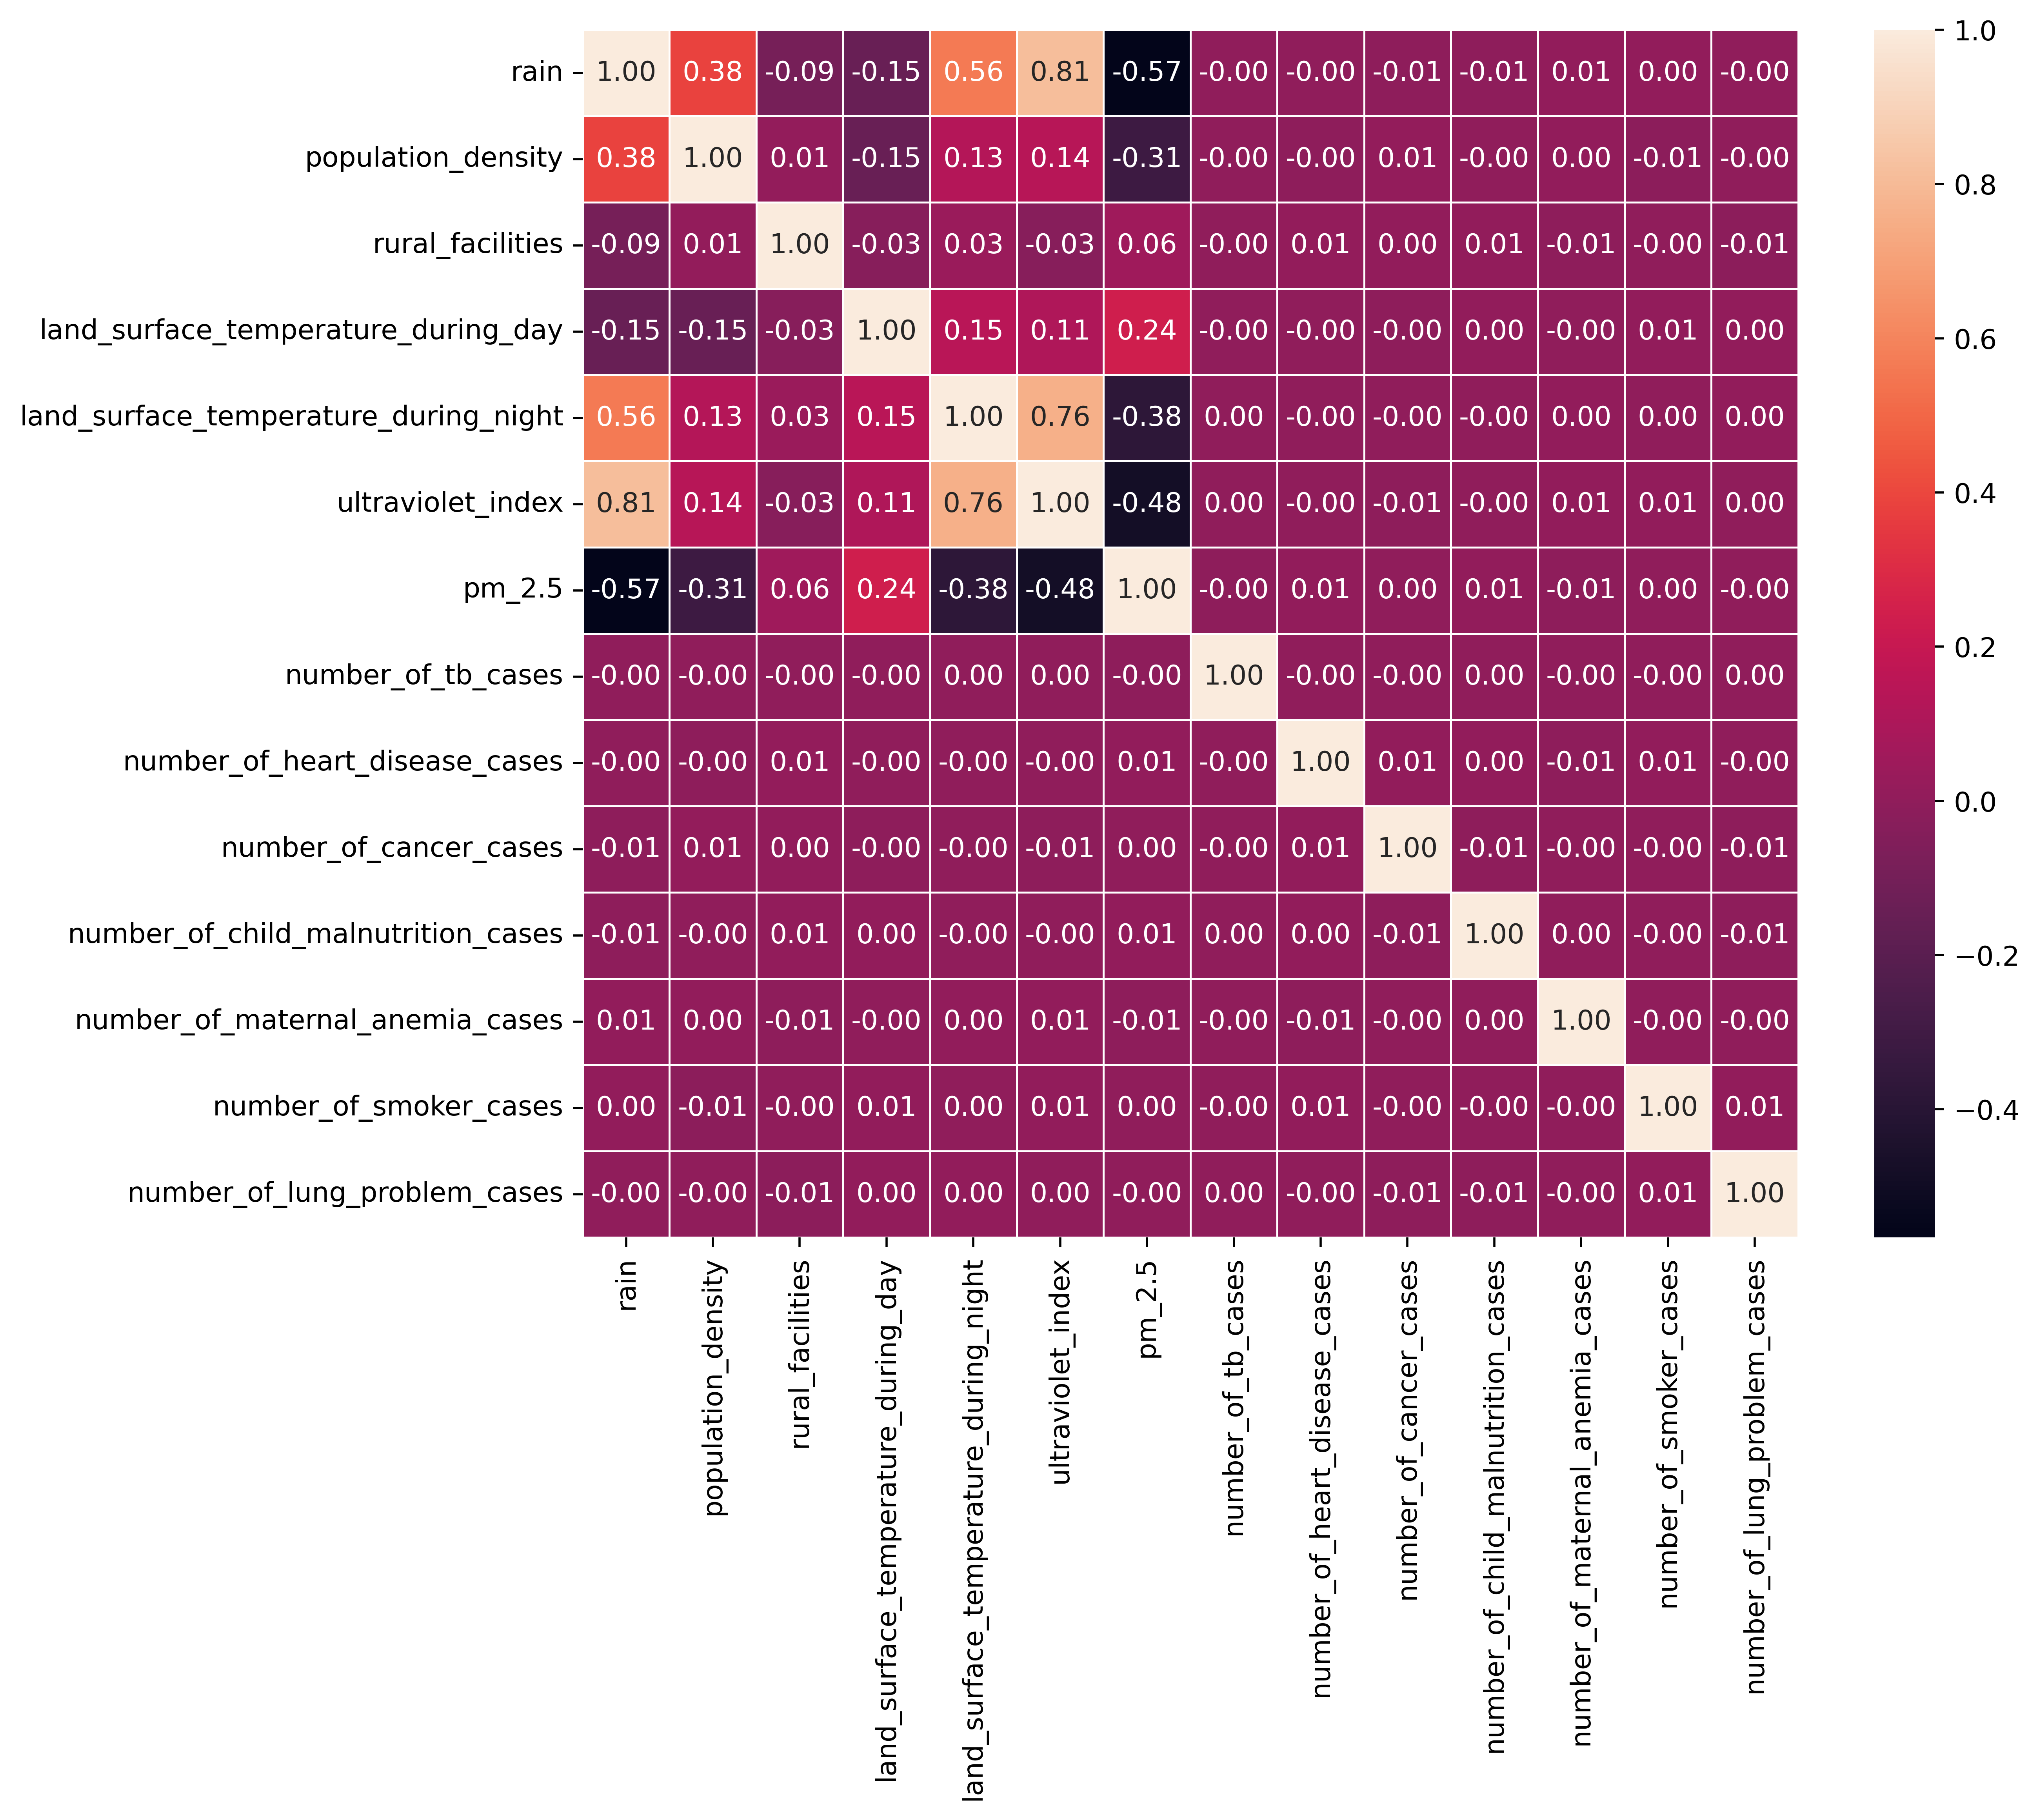

In [ ]:
#Correlation heatmap

corr = ds2.iloc[:,2:16].corr(method = 'pearson')
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


the size of cluster type-1 kcls1
0    70
1    86
2    89
dtype: int64
kcls1                                   0      1      2
number_of_heart_disease_cases        9.46   9.44   9.55
number_of_cancer_cases               7.00   7.01   6.94
number_of_lung_problem_cases        21.01  22.39  22.44
number_of_tb_cases                  28.96  30.30  27.72
number_of_child_malnutrition_cases   6.48   6.51   6.50
number_of_maternal_anemia_cases     10.52  10.59  10.55


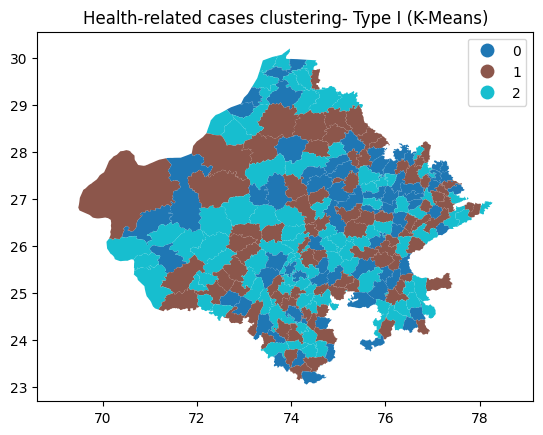

In [ ]:
#Spatial Clustering using KMeans

#Dividing the health-related variables into three cases


cases1=['number_of_child_malnutrition_cases','number_of_maternal_anemia_cases']
cases2=['number_of_tb_cases','number_of_child_malnutrition_cases','number_of_maternal_anemia_cases']
cases3=['number_of_heart_disease_cases','number_of_cancer_cases','number_of_lung_problem_cases']
cases=['number_of_heart_disease_cases','number_of_cancer_cases','number_of_lung_problem_cases','number_of_tb_cases','number_of_child_malnutrition_cases','number_of_maternal_anemia_cases']

#Setting number of clusters and fitting the model
n_clusters=3
kmeans = cluster.KMeans(n_clusters)
kcls1= kmeans.fit(ds2_d[cases1])
kcls2= kmeans.fit(ds2_d[cases2])
kcls3= kmeans.fit(ds2_d[cases3])
kcls= kmeans.fit(ds2_d[cases])

ds2_d['kcls1']=kcls1.labels_
ds2_d['kcls2']=kcls2.labels_
ds2_d['kcls3']=kcls3.labels_
ds2_d['kcls']=kcls.labels_

#Getting the sizes corresponding to different clusters

ksizes = ds2_d.groupby('kcls1').size()
print('the size of cluster type-1' ,round(ksizes,2))

# Calculate the mean for each cluster
print(round(ds2_d.groupby('kcls1')[cases].mean(),2).T)


# Plot clusters
ds2_d.plot(column='kcls1', categorical=True, legend=True, linewidth=0)
# Remove axis
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title('Health-related cases clustering- Type I (K-Means)')
# Display the map
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

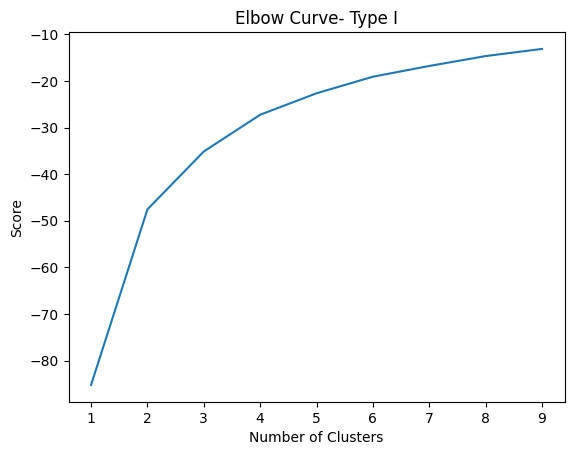

In [ ]:
#Identifying the number of clusters using elbow method

K_clusters = range(1,10)
kmeans = [cluster.KMeans(n_clusters=i) for i in K_clusters]

score = [kmeans[i].fit(ds2_d[cases1]).score(ds2_d[cases1]) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve- Type I')
plt.show()

AHC_cls                                  0       1       2
number_of_heart_disease_cases        9.522   9.443   9.469
number_of_cancer_cases               6.974   6.975   7.004
number_of_lung_problem_cases        22.422  22.206  20.978
number_of_tb_cases                  27.934  30.472  28.991
number_of_child_malnutrition_cases   6.524   6.474   6.477
number_of_maternal_anemia_cases     10.612  10.519  10.497


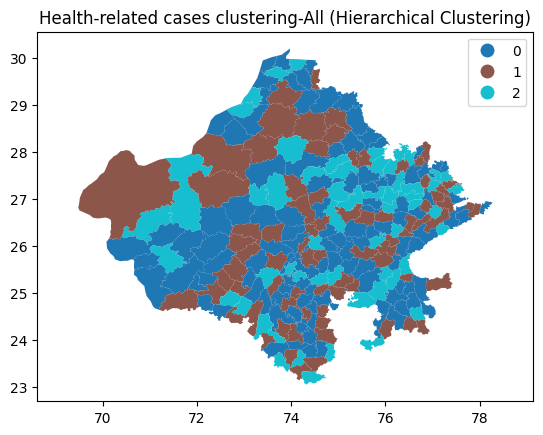

In [ ]:
# Spatial clustering using Agglomerative clustering

from sklearn.cluster import AgglomerativeClustering

# Initialize the algorithm
model = AgglomerativeClustering(n_clusters=3)
# Run clustering
model.fit(ds2_d[cases])
# Assign labels to main data table
ds2_d["AHC_cls"] = model.labels_

AHCmeans = ds2_d.groupby("AHC_cls")[cases].mean()
print(AHCmeans.T.round(3))

# Plot unique values choropleth including a legend and with no boundary lines
ds2_d.plot(column='AHC_cls', categorical=True, legend=True, linewidth=0)

plt.axis('equal')
# Add title
plt.title('Health-related cases clustering-All (Hierarchical Clustering)')
# Display the map
plt.show()

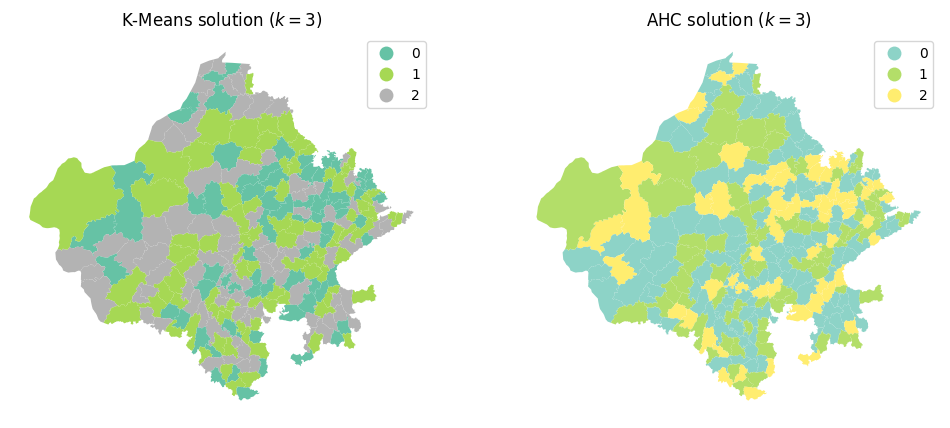

In [ ]:
#Comparative analysis of clustering- KMeans vs AHC


# Set up figure and ax
f, axs = plt.subplots(1, 2, figsize=(12, 6))

### K-Means ###
ax = axs[0]
# Plot unique values choropleth including

ds2_d.plot(
    column='kcls',
    categorical=True,
    cmap="Set2",
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Add title
ax.set_title("K-Means solution ($k=3$)")

### AHC ###
ax = axs[1]
# Plot unique values choropleth including
# a legend and with no boundary lines
ds2_d.plot(
    column="AHC_cls",
    categorical=True,
    cmap="Set3",
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Add title
ax.set_title("AHC solution ($k=3$)")

# Display the map
plt.show()

In [ ]:
#cluster coherence score

from sklearn.preprocessing import robust_scale
from sklearn import metrics

ds2_d_scaled = robust_scale(ds2_d[cases])

ch_scores = []
for cluster_type in ("kcls", "AHC_cls"):
    # compute the CH score
    ch_score = metrics.calinski_harabasz_score(
        # using scaled variables
        robust_scale(ds2_d[cases]),
        # using these labels
        ds2_d[cluster_type],
    )
    # and append the cluster type with the CH score
    ch_scores.append((cluster_type, ch_score))

# re-arrange the scores into a dataframe for display
pd.DataFrame(
    ch_scores, columns=["cluster type", "CH score"]
).set_index("cluster type")

,CH score
cluster type,
kcls,27.886369
AHC_cls,25.671677


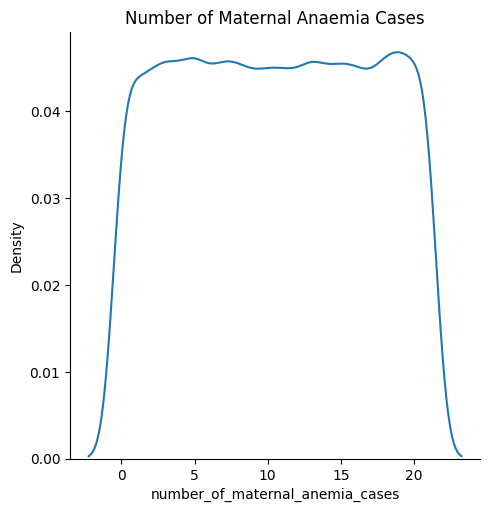

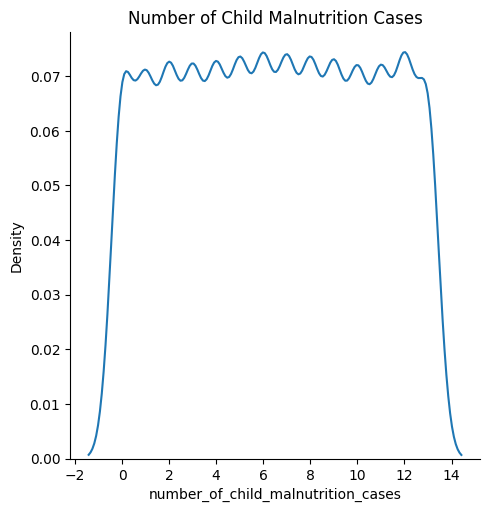

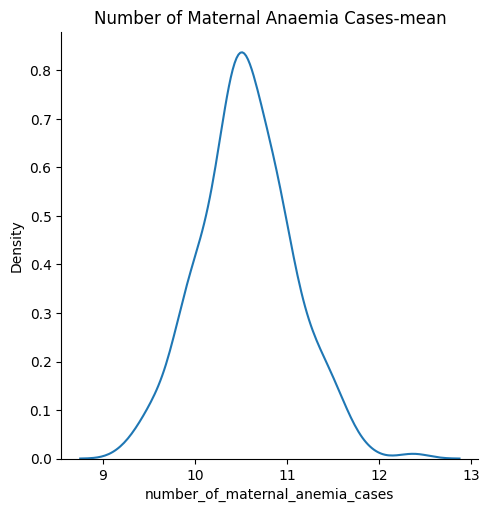

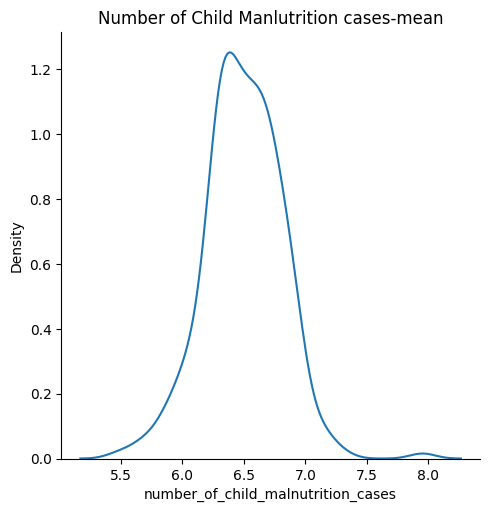

p value:0.5862
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0022
Reject null hypothesis >> The data is not normally distributed


In [ ]:
#Hypothesis testing

#Check Normality function

sns.displot(ds2['number_of_maternal_anemia_cases'], kind='kde').set(title='Number of Maternal Anaemia Cases')
plt.show()

sns.displot(ds2['number_of_child_malnutrition_cases'], kind='kde').set(title='Number of Child Malnutrition Cases')
plt.show()


sns.displot(ds2_d['number_of_maternal_anemia_cases'], kind='kde').set(title='Number of Maternal Anaemia Cases-mean')
plt.show()

sns.displot(ds2_d['number_of_child_malnutrition_cases'], kind='kde').set(title='Number of Child Manlutrition cases-mean')
plt.show()


def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

check_normality(ds2_d['number_of_maternal_anemia_cases'])

check_normality(ds2_d['number_of_child_malnutrition_cases'])

In [ ]:
#Statistical test- nonparametric

ttest,pvalue = stats.mannwhitneyu(ds2_d['number_of_maternal_anemia_cases'],ds2_d['number_of_child_malnutrition_cases'], alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to recejt null hypothesis")

p-value:0.0000
Reject null hypothesis
